n=47
Height: 4, Aspect: 1.33


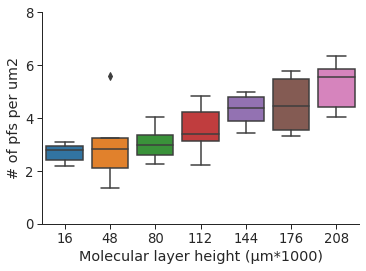

In [2]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import argparse

script_n = 'pfs_density_210306'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

import compress_pickle
db_f = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/pfs_density_db_210306.gz'
pf_db = compress_pickle.load(db_f)

mpd = MyPlotData()
n = 0

densities = []

for block in pf_db:
    if 'density' not in pf_db[block]:
        continue
    if block == 'x84y50':
        continue
    mpd.add_data_point(
        y=pf_db[block]['y_dist'],
        density=pf_db[block]['density'],
    )
    densities.append(pf_db[block]['density'])
    n+=1

print(f'n={n}')

importlib.reload(my_plot); my_plot.my_cat_bar_plot(
    mpd,
    x="y",
    y="density",
    # hue="type",
    # hue_order=['All', 'Per PC', 'Per pf'],
    # hue_order=['All', 'Per PC'],
    ylim=[0, 8],
    context='paper',
    kind='box',
#     font_scale=1.4,
#     add_swarm=True,
#     inner='box',
    height=4,
#     bw=.25,
#     cut=0,
    y_axis_label='# of pfs per um2',
    x_axis_label='Molecular layer height (µm*1000)',
    save_filename=f'{script_n}.svg',
    show=True,
    )


In [3]:
import statistics
print(statistics.mean(densities))
print(statistics.stdev(densities))

3.7577954111580754
1.218471784324993


In [ ]:
average density: 3.7030876767301093
average density: 3.7260130709318986

Height: 2.25, Aspect: 1.7777777777777777


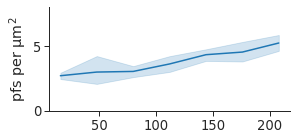

In [49]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x="y",
    y="density",
    ylim=[0, 8],
    context='paper',
#     kind='box',
#     height=4,
    height=2.25,
    width=4,
#     xticks=[],
    y_axis_label='pfs per µm$\mathregular{^{2}}$',
#     x_axis_label='Molecular layer height (µm*1000)',
    save_filename=f'{script_n}_line.svg',
    show=True,
    )
